<h3 align="right">mCP, &nbsp; dSPN, &nbsp; 160118_c7_D1, &nbsp; animal_1_n30_04102017_cel1 </h3>

# Model selection

## Model data

In [1]:
import cell_model, cell_evaluator
morphofile = 'morphology/animal_1_n30_04102017_cel1.swc'
parameters = cell_model.define_parameters('parameters.json')
mechanisms = cell_model.define_mechanisms('mechanisms.json')
protocols = cell_evaluator.define_protocols('protocols.json')
calculator = cell_evaluator.define_fitness_calculator(protocols, 'features.json')
expdata = {
    'IV_546.soma.v': 'expdata/ECall_IV_ch3_546.dat',
    'IV_556.soma.v': 'expdata/ECall_IV_ch3_556.dat',    
    'IDthresh-sub_586.soma.v': 'expdata/ECall_IDthresh_ch3_586.dat',    
    'IDthresh_587.soma.v': 'expdata/ECall_IDthresh_ch3_587.dat',    
    'IDthresh_588.soma.v': 'expdata/ECall_IDthresh_ch3_588.dat',    
    'IDthresh_598.soma.v': 'expdata/ECall_IDthresh_ch3_598.dat',    
}

## Simulation environment

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
import json
import pandas
import efel
import numpy as np
import bluepyopt as bpopt
import bluepyopt.ephys as ephys

In [4]:
from utils import *

In [5]:
%%capture
!rm -rf x86_64
!nrnivmodl mechanisms

## Cell model definition

In [6]:
morphology = ephys.morphologies.NrnFileMorphology(
    morphofile, do_replace_axon=True)

In [7]:
cell = ephys.models.CellModel(
    'dspn', 
    morph=morphology, 
    mechs=mechanisms, 
    params=parameters)
print (cell)

dspn:
  morphology:
    morphology/animal_1_n30_04102017_cel1.swc
  mechanisms:
    pas.all: pas at ['all']
    naf.somatic: naf at ['somatic']
    kaf.somatic: kaf at ['somatic']
    kas.somatic: kas at ['somatic']
    kdr.somatic: kdr at ['somatic']
    kir.somatic: kir at ['somatic']
    cal12.somatic: cal12 at ['somatic']
    cal13.somatic: cal13 at ['somatic']
    can.somatic: can at ['somatic']
    car.somatic: car at ['somatic']
    cadyn.somatic: cadyn at ['somatic']
    caldyn.somatic: caldyn at ['somatic']
    sk.somatic: sk at ['somatic']
    bk.somatic: bk at ['somatic']
    Im.somatic: Im at ['somatic']
    naf.axonal: naf at ['axonal']
    kas.axonal: kas at ['axonal']
    Im.axonal: Im at ['axonal']
    naf.basal: naf at ['basal']
    kaf.basal: kaf at ['basal']
    kas.basal: kas at ['basal']
    kdr.basal: kdr at ['basal']
    kir.basal: kir at ['basal']
    cal12.basal: cal12 at ['basal']
    cal13.basal: cal13 at ['basal']
    car.basal: car at ['basal']
    cat32.ba

In [8]:
opt_params = [p.name for p in cell.params.values() if not p.frozen]
opt_bounds = [p.bounds for p in cell.params.values() if not p.frozen]
for x in sorted(opt_params): print (x)

g_pas.axonal
g_pas.basal
g_pas.somatic
gbar_Im.axonal
gbar_Im.somatic
gbar_bk.basal
gbar_bk.somatic
gbar_kaf.basal
gbar_kaf.somatic
gbar_kas.axonal
gbar_kas.basal
gbar_kas.somatic
gbar_kdr.basal
gbar_kdr.somatic
gbar_kir.basal
gbar_kir.somatic
gbar_naf.axonal
gbar_naf.basal
gbar_naf.somatic
gbar_sk.basal
gbar_sk.somatic


## Cell evaluator

In [9]:
simulator = ephys.simulators.NrnSimulator()

In [10]:
evaluator = ephys.evaluators.CellEvaluator(
    cell_model=cell,
    param_names=opt_params,
    fitness_protocols=protocols,
    fitness_calculator=calculator,
    sim=simulator)

## Optimisation results

In [11]:
with open('log.json') as fp:
    log = json.load(fp)

<IPython.core.display.Javascript object>


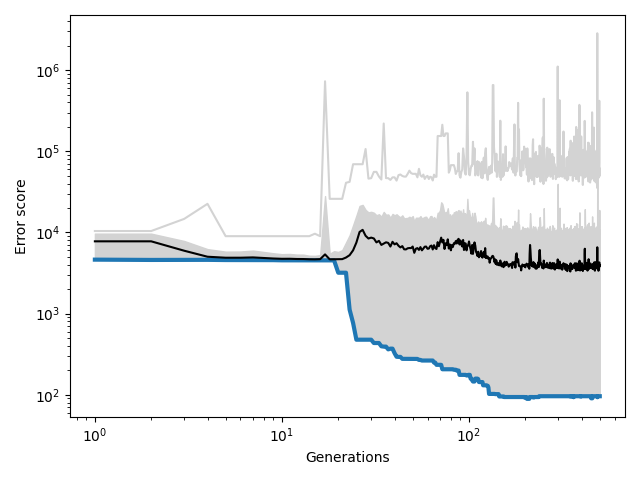

In [12]:
plot_log(log)

In [13]:
best_models = json.load(open('best_models.json'))
pandas.options.display.float_format = '{:,.4g}'.format
bm = pandas.DataFrame(best_models)
bm.T

,0,1,2,3,4,5,6,7,8,9
g_pas.axonal,0.0254,0.02787,0.02755,0.02528,0.02185,0.02443,0.02528,0.02538,0.02755,0.02158
g_pas.somatic,0.0007124,0.0006362,0.000617,0.0006857,0.0008215,0.0008192,0.0007108,0.0007124,0.000617,0.0008192
g_pas.basal,1.001e-05,1e-05,1e-05,1e-05,1.001e-05,1e-05,1e-05,1e-05,1e-05,1.001e-05
gbar_naf.axonal,1.385,0.1066,1.839,1.42,1.035,1.731,0.0985,0.0985,0.02041,0.05097
gbar_kas.axonal,0.1674,0.1445,0.1285,0.1811,0.1026,0.1773,0.1674,0.1674,0.1674,0.1367
gbar_Im.axonal,0.1282,0.08853,0.07375,0.0921,0.03348,0.1014,0.09243,0.114,0.07342,0.06178
gbar_naf.somatic,12.04,11.68,12.05,12.05,12.42,12.33,12.05,12.05,12.05,12.42
gbar_kaf.somatic,0.5264,0.4369,0.5671,0.5293,0.609,0.609,0.5264,0.5264,0.5264,0.609
gbar_kas.somatic,0.003141,1.445e-05,0.0005091,0.0008473,0.0002516,7.794e-05,0.0008473,0.003141,0.003208,5.917e-06
gbar_kdr.somatic,0.000318,0.0005947,0.0002668,0.0001933,0.0003278,0.0002107,0.0002028,0.0002668,0.0002668,0.0002661


<IPython.core.display.Javascript object>


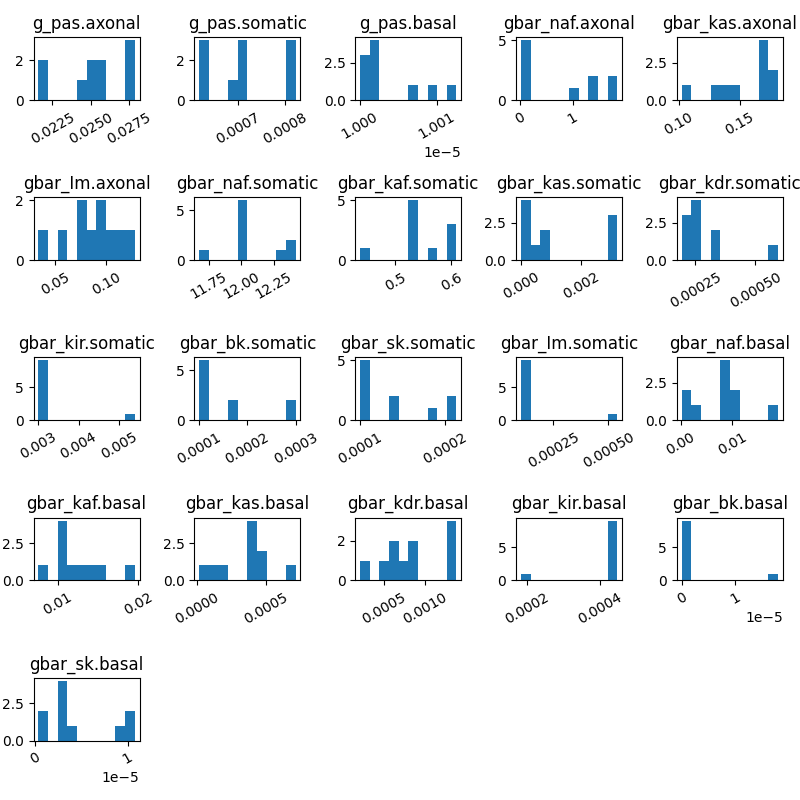

In [14]:
axs = bm.hist(grid=False, xrot=30, figsize=(8,8))
plt.tight_layout();

<IPython.core.display.Javascript object>


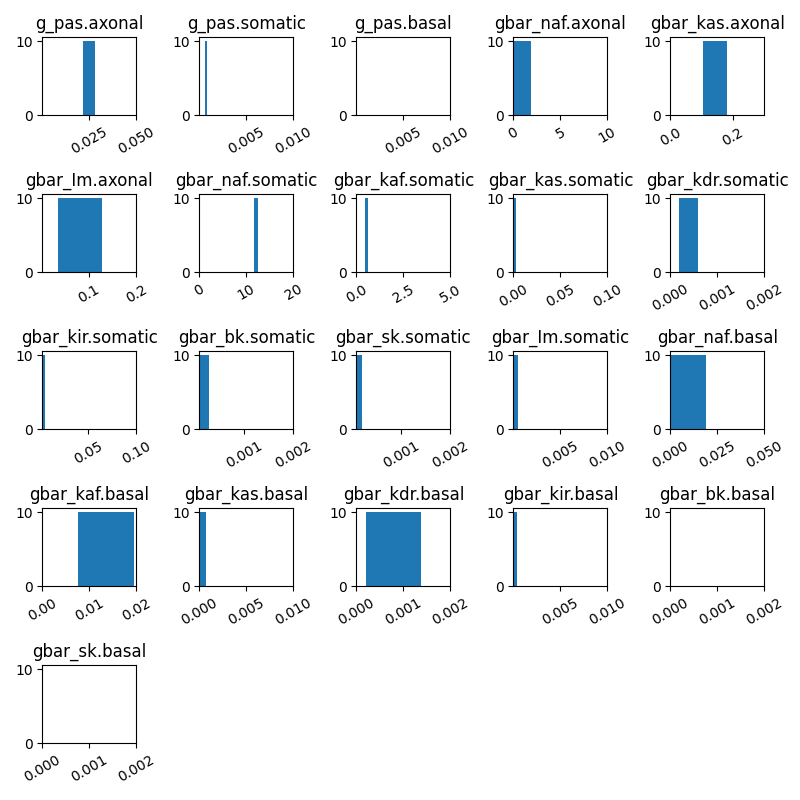

In [15]:
axs = bm.hist(bins=1, grid=False, xrot=30, figsize=(8,8))
for ax, bounds in zip(axs.flatten(), opt_bounds):
        ax.set_xlim(bounds)
plt.tight_layout();

In [16]:
evaluate_all = False # True
best_objectives = []
if evaluate_all:
    for params in best_models:
        objectives = evaluator.evaluate_with_dicts(params)
        best_objectives.append(objectives)
    df = pandas.DataFrame(best_objectives).T
    df = df.sort_index(axis=0, ascending=False)

In [17]:
if evaluate_all:
    plot_scores(df, figsize=(6, 8), vmin=0, vmax=10)

## Single-cell simulation

In [21]:
ind = 0
test_parameters = best_models[ind]
test_parameters

{'g_pas.axonal': 0.02539607908960475,
 'g_pas.somatic': 0.0007123557376033785,
 'g_pas.basal': 1.0006727252042588e-05,
 'gbar_naf.axonal': 1.3846651207620264,
 'gbar_kas.axonal': 0.16743360206061478,
 'gbar_Im.axonal': 0.12816482033762164,
 'gbar_naf.somatic': 12.04483322301921,
 'gbar_kaf.somatic': 0.5263665205909309,
 'gbar_kas.somatic': 0.003140889296983106,
 'gbar_kdr.somatic': 0.00031798926773759275,
 'gbar_kir.somatic': 0.003001309531319183,
 'gbar_bk.somatic': 0.00010017414725181322,
 'gbar_sk.somatic': 0.00013535364001508138,
 'gbar_Im.somatic': 0.00013704608212433467,
 'gbar_naf.basal': 0.008194481372808838,
 'gbar_kaf.basal': 0.010701295106269668,
 'gbar_kas.basal': 0.000388181845534517,
 'gbar_kdr.basal': 0.0008406948273352783,
 'gbar_kir.basal': 0.0004262224304043882,
 'gbar_bk.basal': 6.688506647743428e-09,
 'gbar_sk.basal': 2.6284062501463424e-06}

In [ ]:
test_parameters = 

In [19]:
test_responses = evaluator.run_protocols(
    protocols=protocols.values(), 
    param_values=test_parameters)

<IPython.core.display.Javascript object>


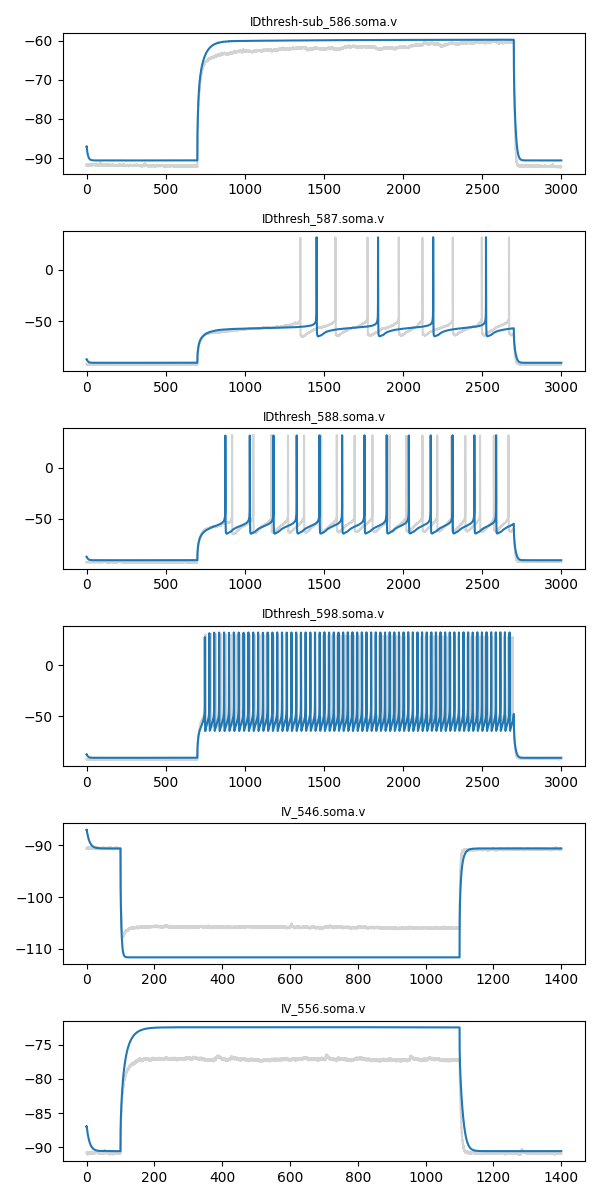

In [20]:
plot_responses(test_responses, expdata=expdata, junction_potential=11.5, figsize=(6,12))

<IPython.core.display.Javascript object>


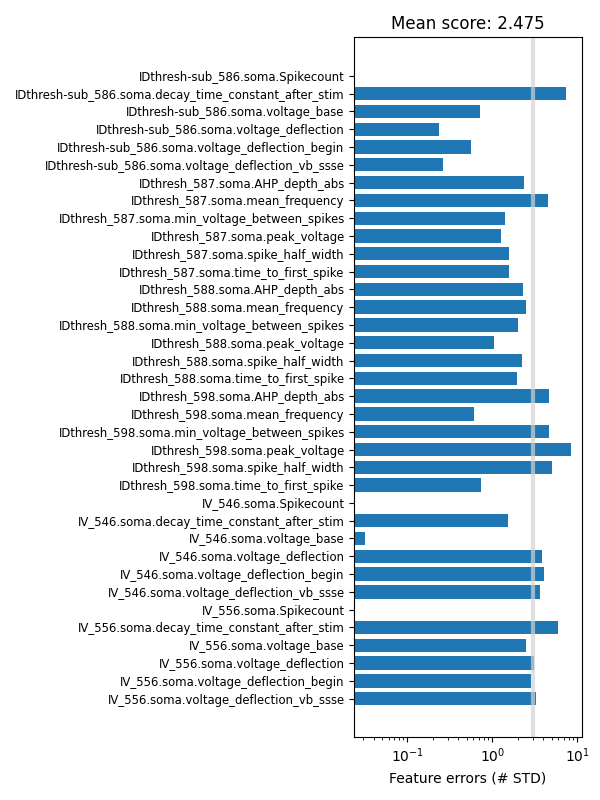

In [21]:
if evaluate_all:
    objectives = best_objectives[ind]
else:
    objectives = evaluator.evaluate_with_dicts(test_parameters)
plot_objectives(objectives, figsize=(6,8))

In [22]:
from numpy.linalg import norm
d = []
for i in range(len(best_models)):
    v = []
    for j in range(len(best_models)):
        p1 = np.array([best_models[i][p] for p in sorted(best_models[i])])
        p2 = np.array([best_models[j][p] for p in sorted(best_models[j])])
        v.append(norm((p1-p2)/(p1+p2)))
    d.append(v)
df = pandas.DataFrame(data=np.round(d,2))
def highlight_low(x):
    def c(v):
        r = int(v/x.max()*255)
        g = int(v/x.max()*128)+127
        b = 255
        return '#%02x%02x%02x' % (r, g, b)
    return ['background-color: %s' % c(v) for v in x]
df.style.apply(highlight_low)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,2.080000,1.230000,0.800000,1.900000,1.730000,1.150000,0.910000,1.370000,1.830000
1,2.080000,0.000000,2.250000,2.120000,2.070000,2.300000,1.960000,1.940000,2.200000,1.500000
2,1.230000,2.250000,0.000000,0.950000,1.930000,1.850000,1.300000,1.530000,1.230000,2.010000
3,0.800000,2.120000,0.950000,0.000000,1.880000,1.770000,0.900000,1.120000,1.420000,1.860000
4,1.900000,2.070000,1.930000,1.880000,0.000000,1.960000,1.990000,2.100000,2.290000,2.060000
5,1.730000,2.300000,1.850000,1.770000,1.960000,0.000000,1.960000,1.990000,2.180000,1.940000
6,1.150000,1.960000,1.300000,0.900000,1.990000,1.960000,0.000000,0.680000,1.220000,1.650000
7,0.910000,1.940000,1.530000,1.120000,2.100000,1.990000,0.680000,0.000000,1.170000,1.660000
8,1.370000,2.200000,1.230000,1.420000,2.290000,2.180000,1.220000,1.170000,0.000000,1.830000
9,1.830000,1.500000,2.010000,1.860000,2.060000,1.940000,1.650000,1.660000,1.830000,0.000000


In [23]:
hall_of_fame = []
selected = range(10)
for model in selected:
    hall_of_fame.append(best_models[model])
with open('hall_of_fame.json', 'w') as fp:
    json.dump(hall_of_fame, fp, indent=4, sort_keys=True)

In [24]:
zscores = pandas.DataFrame(best_objectives).mean(axis=1)
print(f'Z-score mean {zscores.mean():.3f}, range {zscores.min():.3f}-{zscores.max():.3f}')

Z-score mean 2.582, range 2.475-2.649
